<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Codenation/blob/master/Projeto_Final/Prjct_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Codenation

## Importing Files

In [ ]:
#Importando as bibliotecas básicas:
import pandas as pd
import numpy as np

# Para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from zipfile import ZipFile # Para abrir arquivos "zipados"
import gc

#Para setar o número de linhas e colunas visíveis no dataset
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [ ]:
zip_file = ZipFile("/content/estaticos_market.csv.zip")
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
list(zip(dfs))

[('estaticos_market.csv',)]

In [ ]:
mkt = pd.DataFrame(dfs['estaticos_market.csv'])

port1 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv")
port2 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv")
port3 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv")

mkt.shape, port1.shape, port2.shape, port3.shape

((462298, 182), (555, 182), (566, 2), (265, 2))

In [ ]:
# Reduzindo e convertendo dados para reduzir memória 
ints = mkt.select_dtypes(include=['int64','int32','int16']).columns
mkt[ints] = mkt[ints].apply(pd.to_numeric, downcast='integer')

floats = mkt.select_dtypes(include=['float']).columns
mkt[floats] = mkt[floats].apply(pd.to_numeric, downcast='float')

objects = mkt.select_dtypes('object').columns
mkt[objects] = mkt[objects].apply(lambda x: x.astype('category'))

mkt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), category(27), float32(144), int16(1), int32(1)
memory usage: 348.4 MB


In [ ]:
mkt.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,Fal

## Droping columns

Dropping useless columns

In [ ]:
mkt.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
for colunas in mkt.columns:
  if mkt[colunas].notna().sum() == 0:
    mkt.drop(colunas, axis=1, inplace=True)
    print(colunas)

qt_alteracao_socio_total
qt_alteracao_socio_90d
qt_alteracao_socio_180d
qt_alteracao_socio_365d
grau_instrucao_macro_desconhecido


# Dropping columns with more than 70% of NA

In [ ]:
cols70na = []
for column in mkt.columns:
  if mkt[column].isna().sum() > (mkt.shape[0]*0.70):
    mkt.drop(column, axis=1, inplace=True)
    # print(column)
    cols70na.append(column)
len(cols70na)

124

In [ ]:
mkt.isna().sum()

id                                            0
fl_matriz                                     0
de_natureza_juridica                          0
sg_uf                                         0
natureza_juridica_macro                       0
de_ramo                                       0
setor                                      1927
idade_empresa_anos                            0
idade_emp_cat                                 0
fl_me                                         0
fl_sa                                         0
fl_epp                                        0
fl_mei                                        0
fl_ltda                                       0
dt_situacao                                   6
fl_st_especial                                0
fl_email                                      0
fl_telefone                                   0
fl_rm                                         0
nm_divisao                                 1927
nm_segmento                             

In [ ]:
# Selecionando dados "inteiros" e preenchendo com 0
num_col = mkt.columns.str.contains("qt_|tx_|idade_d|idade_a|vl_")
for n in range(0, len(mkt.columns)):
  if num_col[n] == True:
    mkt.iloc[:,n].fillna(0, inplace=True)

In [ ]:
# Convertendo dados flutuantes em inteiro?
mkt.select_dtypes(include="number").astype(dtype=int, errors="ignore")

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
0,14.457534,0.0,0.0,23.0,NaN,2.0,2.0,0.0,44.000000,47.0,41.0,2.0,2.0,0.0,3.132173e+06,3.132173e+06
1,1.463014,0.0,0.0,9.0,468.929993,1.0,1.0,0.0,27.000000,27.0,27.0,1.0,1.0,0.0,2.100000e+05,2.100000e+05
2,7.093151,0.0,0.0,26.0,713.500000,1.0,1.0,0.0,32.000000,32.0,32.0,0.0,1.0,0.0,5.000000e+04,5.000000e+04
3,6.512329,0.0,0.0,26.0,475.730011,1.0,1.0,0.0,36.000000,36.0,36.0,1.0,1.0,0.0,2.100000e+05,2.100000e+05
4,3.200000,0.0,0.0,27.0,2874.040039,1.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,2.100000e+05,2.100000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,3.254795,0.0,0.0,22.0,585.630005,1.0,1.0,0.0,31.000000,31.0,31.0,1.0,1.0,0.0,5.000000e+04,5.000000e+04
462294,8.953424,0.0,0.0,23.0,2429.889893,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,2.100000e+05,2.100000e+05
462295,20.745205,0.0,0.0,23.0,3150.810059,1.0,1.0,0.0,74.000000,74.0,74.0,1.0,1.0,0.0,2.100000e+05,2.100000e+05
462296,1.909589,0.0,0.0,20.0,2752.489990,5.0,5.0,0.0,31.666666,39.0,25.0,3.0,2.0,1.0,4.327344e+05,4.327344e+05


In [ ]:
mkt.query("idade_empresa_anos < 1").idade_empresa_anos.round(0).astype("int16")

7         0
30        1
32        0
36        0
39        0
         ..
462239    1
462256    1
462274    0
462289    1
462297    1
Name: idade_empresa_anos, Length: 46780, dtype: int16

In [ ]:
mkt.info(memory_usage="deep")

### Cat

In [ ]:
mkt.select_dtypes("category")

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,2005-03-25,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,False,RN,VERDE,ACIMA DE 1 ANO,ALTA,BOA,False,LESTE POTIGUAR,NATAL,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,2017-05-12,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,NaN,PI,CINZA,ATE 1 ANO,BAIXA,NaN,False,CENTRO NORTE PIAUIENSE,TERESINA,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,2011-09-26,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,True,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,NaN,False,CENTRO AMAZONENSE,MANAUS,True,"ATE R$ 81.000,00","ATE R$ 81.000,00"
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,2012-04-25,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,False,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,NaN,False,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,2015-08-17,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,True,False,RN,VERDE,ACIMA DE 1 ANO,ALTA,NaN,False,LESTE POTIGUAR,NATAL,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,1 a 5,2015-07-28,NAO,COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E...,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,True,True,RN,VERDE,ACIMA DE 1 ANO,ALTA,NaN,False,AGRESTE POTIGUAR,BORBOREMA POTIGUAR,False,"ATE R$ 81.000,00","ATE R$ 81.000,00"
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,5 a 10,2009-11-16,SIM,SELECAO AGENCIAMENTO E LOCACAO DE MAO DE OBRA,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,False,False,False,False,False,PI,LARANJA,ACIMA DE 1 ANO,MUITO BAIXA,NaN,False,CENTRO NORTE PIAUIENSE,TERESINA,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,> 20,2005-11-03,SIM,ATIVIDADES DE ATENCAO A SAUDE HUMANA,SAUDE HUMANA E SERVICOS SOCIAIS,False,False,False,False,False,MA,AMARELO,ACIMA DE 1 ANO,MEDIA,NaN,False,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1 a 5,2016-11-30,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,False,False,RO,VERDE,ACIMA DE 1 ANO,ALTA,NaN,False,NaN,NaN,False,"DE R$ 360.000,01 A R$ 1.500.000,00","DE R$ 360

In [ ]:
mkt.de_faixa_faturamento_estimado_grupo.nunique()

11

In [ ]:
test = pd.DataFrame()
for coluna in mkt.select_dtypes("category").columns:
  if mkt[coluna].nunique() <= 11:
    print(coluna)
    test = pd.concat([test, pd.get_dummies(mkt[coluna], dummy_na=True)], axis=1)
    mkt.drop(coluna, axis=1, inplace=True)

In [ ]:
mkt.shape

(462298, 159)

In [ ]:
mkt = pd.concat([mkt, test], axis=1)

In [ ]:
mkt.shape

(462298, 244)

In [ ]:
cat_list = mkt.select_dtypes("category").columns
pd.get_dummies(data = mkt[cat_list], dummy_na=True)

## Some Analysis

In [ ]:
# Observar se os faturamentos das empresas são diferentes
mkt[["de_faixa_faturamento_estimado","de_faixa_faturamento_estimado_grupo"]].isna().sum()
for n in range(0, mkt.shape[0]):
  if mkt.de_faixa_faturamento_estimado[n] != mkt.de_faixa_faturamento_estimado_grupo[n]:
    (mkt.de_faixa_faturamento_estimado[n], mkt.de_faixa_faturamento_estimado_grupo[n])

Fixing socios' age data

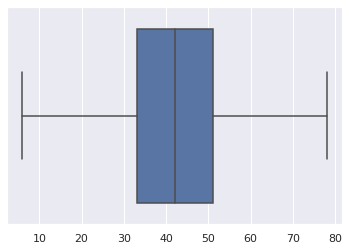

In [ ]:
# Devo remover os outliers?
sns.boxplot(pd.DataFrame(mkt["idade_media_socios"].round(0)));

In [ ]:
# How could it be posible?!
mkt.query(""" idade_media_socios > 58 & (idade_acima_de_58 < 1 | idade_acima_de_58 != idade_acima_de_58)
          """)["idade_media_socios"].round(0).value_counts().sum()

In [ ]:
print(f"Isso equivale a {33885*100/mkt.shape[0]:.2f}%")

Isso equivale a 7.33%


In [ ]:
q1, q2, q3 = mkt.idade_media_socios.quantile([0.25, 0.5, 0.75])
IQR = q3 - q1
int_sup = IQR * 1.5 + q3
int_inf = q1 - IQR * 1.5
int_sup, int_inf

(78.0, 6.0)

In [ ]:
mkt.loc[mkt["idade_media_socios"] > int_sup, "idade_media_socios"] = mkt.idade_media_socios.median()
mkt.loc[mkt["idade_media_socios"] < int_inf, "idade_media_socios"] = mkt.idade_media_socios.median()

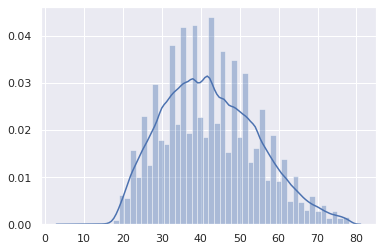

In [ ]:
sns.distplot(pd.DataFrame(mkt["idade_media_socios"].round(0)));

---

In [ ]:
port1.head(1)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,False,False,True,False,2018-03-06,False,Fals

In [ ]:
port1.de_natureza_juridica.unique(), port1.natureza_juridica_macro.unique(), 
port1.de_ramo.unique(), port1.setor.unique()

(array(['EMPRESARIO INDIVIDUAL', 'SOCIEDADE EMPRESARIA LIMITADA',
        'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
        'SOCIEDADE EMPRESARIA EM NOME COLETIVO',
        'SOCIEDADE ANONIMA FECHADA', 'SOCIEDADE EM CONTA DE PARTICIPACAO'],
       dtype=object),
 array(['OUTROS', 'ENTIDADES EMPRESARIAIS'], dtype=object),
 array(['COMERCIO VAREJISTA', 'BENS DE CONSUMO'], dtype=object),
 array(['COMERCIO', 'INDUSTRIA', 'SERVIÇO'], dtype=object))

---

In [ ]:
port2 = port2.merge(right=mkt, how="inner")

In [ ]:
port2.de_natureza_juridica.unique(), port2.natureza_juridica_macro.unique(), 
port2.de_ramo.unique(), port2.setor.unique()

([ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL, SERVICOS DE EDUCACAO, PRODUTOS DE AGROPECUARIA, SERVICOS ADMINISTRATIVOS, COMERCIO POR ATACADO, ..., ATIVIDADES IMOBILIARIAS, ELETRICIDADE E GAS, TEXTEIS, SERVICOS FINANCEIROS, CULTURA, ESPORTE E RECREACAO]
 Length: 29
 Categories (29, object): [ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL, SERVICOS DE EDUCACAO, PRODUTOS DE AGROPECUARIA,
                           SERVICOS ADMINISTRATIVOS, ..., ELETRICIDADE E GAS, TEXTEIS, SERVICOS FINANCEIROS,
                           CULTURA, ESPORTE E RECREACAO],
 [SERVIÇO, AGROPECUARIA, COMERCIO, CONSTRUÇÃO CIVIL, INDUSTRIA]
 Categories (5, object): [SERVIÇO, AGROPECUARIA, COMERCIO, CONSTRUÇÃO CIVIL, INDUSTRIA])

In [ ]:
counter = 0
for id_port in port3.iloc[:,1]:
  for id_mkt in mkt.iloc[:,0]:
    if id_port == id_mkt:
      counter += 1
counter

265

In [ ]:
port3.merge(right=mkt, how="inner")

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
0,0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813698,> 20,False,False,False,False,False,2005-11-03,False,True,False,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,False,2.0,5.0,False,MA,VERDE,ACIMA DE 1 ANO,26.0,ALTA,False,644.270020,OESTE MARANHENSE,PINDARE,True,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",141308384.0,144348384.0
1,1,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389042,15 a 20,False,False,False,False,False,2005-09-24,False,False,True,NAO,EDUCACAO,EDUCACAO,False,False,True,False,1.0,1.0,False,PI,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,688.309998,NORTE PIAUIENSE,BAIXO PARNAIBA PIAUIENSE,True,2.0,2.0,0.0,70.0,70.0,70.0,1.0,0.0,1.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",27818640.0,27818640.0
2,2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,True,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AM,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.380821,> 20,False,False,False,False,False,1998-07-28,False,True,True,SIM,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,False,False,0.0,0.0,False,AM,AZUL,ACIMA DE 1 ANO,23.0,ALTA,False,1881.349976,CENTRO AMAZONENSE,MANAUS,True,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",92728800.0,92728800.0
3,3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.854794,> 20,False,False,False,False,False,2005-10-14,False,False,False,SIM,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,False,2.0,1.0,False,PI,AZUL,ACIMA DE 1 ANO,23.0,ALTA,False,353.660004,CENTRO NORTE PIAUIENSE,VALENCA DO PIAUI,True,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",24418584.0,24418584.0
4,4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.865753,> 20,False,False,False,False,False,2005-06-11,False,False,False,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,False,0.0,0.0,False,RN,AZUL,ACIMA DE 1 ANO,23.0,ALTA,False,NaN,AGRESTE POTIGUAR,BAIXA VERDE,True,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",38585484.0,38585484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,b6966d868fb7976f993aca02fb667c9ae8f5ebf4d2e033...,True,COOPERA

## GarbageCollector

In [ ]:
gc.collect()

0